# Machine Learning Platform to predict a loan will be paid off or not 


### Goal:Using past loan data from lending club to build models that can predict if a loan will be paid off or not. 
### dataset:https://data.world/jaypeedevlin/lending-club-loan-data-2007-11

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Get data
dataset = pd.read_csv("lending_club_loans.csv",skiprows=1,low_memory=False)
'''skiprows:We have to use skip the first row which has some comment data.
low_memory:Internally process the file in chunks, resulting in lower memory use while parsing, but possibly mixed type inference.
To ensure no mixed types set False'''

'skiprows:We have to use skip the first row which has some comment data.\nlow_memory:Internally process the file in chunks, resulting in lower memory use while parsing, but possibly mixed type inference.\nTo ensure no mixed types set False'

In [4]:
#Look at data
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
dataset.shape

(42538, 115)

In [6]:
'''Remove columns with all null values before further exploration'''
loan_without_null = dataset.dropna(axis=1,how='all')

In [7]:
loan_without_null.shape

(42538, 61)

In [8]:
#Split data into training and test test at this stage to avoid data snooping.
from sklearn.model_selection import train_test_split  



In [9]:
#train_set,test_set = train_test_split(loan_without_null, test_size=0.20, random_state=42)

In [10]:
#Explore the data
loan_explore = loan_without_null.copy()

In [11]:
loan_explore.shape

(42538, 61)

In [12]:
loan_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 61 columns):
id                            42538 non-null object
member_id                     42535 non-null float64
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39911 non-null object
emp_length                    42535 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
p

In [13]:
'''Now we need to find the description/importance of each column name,we have data dictionary to get that'''

'Now we need to find the description/importance of each column name,we have data dictionary to get that'

In [14]:
loan_dict = pd.read_csv('LCDataDictionary.csv')

In [15]:
loan_dict.head()


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [16]:
pd.merge(pd.melt(loan_explore.head(1),var_name='LoanStatNew'),loan_dict,how='left',on='LoanStatNew')

,LoanStatNew,value,Description
0,id,1077501,A unique LC assigned ID for the loan listing.
1,member_id,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,5000,The listed amount of the loan applied for by t...
3,funded_amnt,5000,The total amount committed to that loan at tha...
4,funded_amnt_inv,4975,The total amount committed by investors for th...
5,term,36 months,The number of payments on the loan. Values are...
6,int_rate,10.65%,Interest Rate on the loan
7,installment,162.87,The monthly payment owed by the borrower if th...
8,grade,B,LC assigned loan grade
9,sub_grade,B2,LC assigned loan subgrade


In [17]:
'''Observations:
1.There are 61 features out of which 36 are floats and 25 objects
2.Many features have more than 50% null values
3.Following columns can be removed
   1-sub_grade:already have 'grade'
   2-total_rec_prncp,total_rec_int:already have their sum as 'total_pymnt'
   3-id,member_id,emp_title,emp_length,url,desc,title,zip_code,addr_state,earliest_cr_line,
   last_pymnt_d,next_pymnt_d,last_credit_pull_d,pymnt_plan,policy_code,application_type,
   mths_since_last_record,mths_since_last_delinq,issue_d,purpose        
4.loan_status will be response variable
5.For evaluating model,we will aim for high precision'''

"Observations:\n1.There are 61 features out of which 36 are floats and 25 objects\n2.Many features have more than 50% null values\n3.Following columns can be removed\n   1-sub_grade:already have 'grade'\n   2-total_rec_prncp,total_rec_int:already have their sum as 'total_pymnt'\n   3-id,member_id,emp_title,emp_length,url,desc,title,zip_code,addr_state,earliest_cr_line,\n   last_pymnt_d,next_pymnt_d,last_credit_pull_d,pymnt_plan,policy_code,application_type,\n   mths_since_last_record,mths_since_last_delinq,issue_d,purpose        \n4.loan_status will be response variable\n5.For evaluating model,we will aim for high precision"

In [18]:
remove_features = ["id","member_id","sub_grade","emp_title","emp_length","url","desc","title",
                   "zip_code","addr_state","earliest_cr_line",
                   "last_pymnt_d","next_pymnt_d","last_credit_pull_d","pymnt_plan","policy_code",
                   "application_type","total_rec_prncp","total_rec_int","mths_since_last_delinq"
                   ,"mths_since_last_record","issue_d","purpose"]

In [19]:
loan = loan_without_null.copy()

In [20]:
loan = loan.drop(remove_features,axis=1)

In [21]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 38 columns):
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
loan_status                   42535 non-null object
dti                           42535 non-null float64
delinq_2yrs                   42506 non-null float64
fico_range_low                42535 non-null float64
fico_range_high               42535 non-null float64
inq_last_6mths                42506 non-null float64
open_acc                      42506 non-null floa

In [22]:
'''Check unique value count of each column'''
'''loan.tax_liens.nunique()'''
loan.tax_liens.value_counts()

0.0    42429
1.0        1
Name: tax_liens, dtype: int64

In [23]:
'After doing unique value analysis,following columns can be removed as they have constant values'
remove_features = ['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','collections_12_mths_ex_med',
                   'initial_list_status','out_prncp','out_prncp_inv']

In [24]:
loan = loan.drop(remove_features,axis=1)

In [25]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 30 columns):
loan_amnt                  42535 non-null float64
funded_amnt                42535 non-null float64
funded_amnt_inv            42535 non-null float64
term                       42535 non-null object
int_rate                   42535 non-null object
installment                42535 non-null float64
grade                      42535 non-null object
home_ownership             42535 non-null object
annual_inc                 42531 non-null float64
verification_status        42535 non-null object
loan_status                42535 non-null object
dti                        42535 non-null float64
delinq_2yrs                42506 non-null float64
fico_range_low             42535 non-null float64
fico_range_high            42535 non-null float64
inq_last_6mths             42506 non-null float64
open_acc                   42506 non-null float64
pub_rec                    42506 non-null float

In [26]:
'''Observations for 7 Objects:   
1.Following columns data need modification:
   1-term:need to remove word 'months' from data
   2-int_rate,revol_util:need to remove % from data
 
2.Following columns need encoding:
  1-grade,home_ownership,verification_status,loan_status
'''

"Observations for 7 Objects:   \n1.Following columns data need modification:\n   1-term:need to remove word 'months' from data\n   2-int_rate,revol_util:need to remove % from data\n \n2.Following columns need encoding:\n  1-grade,home_ownership,verification_status,loan_status\n"

In [27]:
loan = loan.where(loan.loan_status.str.contains("Fully Paid")
                    | loan.loan_status.str.contains("Charged Off"))

In [28]:
loan_temp = loan.dropna(axis=0, how='all')

In [29]:
loan_temp.loan_status.value_counts(dropna=False)

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [30]:
loan["loan_status"] = loan.loan_status.str.contains("Fully Paid").astype(float)

In [31]:
loan.loan_status.value_counts()

1.0    35574
0.0     6414
Name: loan_status, dtype: int64

In [32]:
from sklearn.base import BaseEstimator,TransformerMixin
import re
class ObjectToNumericConverter(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_name,string):
        self.attribute_name = attribute_name
        self.string = string
    def fit(self, X, y=None):
        return self
    def transform(self,X,y=None):
        #loan_temp = X
       # loan_temp[self.attribute_name].replace(self.string,'',regex=True,inplace=True)
        #loan_temp[[self.attribute_name]] = loan_temp[[self.attribute_name]].apply(pd.to_numeric)
       # return loan_temp.values
      
        X[self.attribute_name].replace(self.string,'',regex=True,inplace=True)
        X[[self.attribute_name]] = X[[self.attribute_name]].apply(pd.to_numeric)
        return X.values

In [33]:
ObjectToNumericConverter("term","months").transform(loan)

array([[5000.0, 5000.0, 4975.0, ..., 744.0, 740.0, 0.0],
       [2500.0, 2500.0, 2500.0, ..., 499.0, 0.0, 0.0],
       [2400.0, 2400.0, 2400.0, ..., 719.0, 715.0, 0.0],
       ..., 
       [5000.0, 5000.0, 0.0, ..., 794.0, 790.0, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=object)

In [34]:
ObjectToNumericConverter("int_rate","%").transform(loan)

array([[5000.0, 5000.0, 4975.0, ..., 744.0, 740.0, 0.0],
       [2500.0, 2500.0, 2500.0, ..., 499.0, 0.0, 0.0],
       [2400.0, 2400.0, 2400.0, ..., 719.0, 715.0, 0.0],
       ..., 
       [5000.0, 5000.0, 0.0, ..., 794.0, 790.0, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=object)

In [35]:
ObjectToNumericConverter("revol_util","%").transform(loan)

array([[5000.0, 5000.0, 4975.0, ..., 744.0, 740.0, 0.0],
       [2500.0, 2500.0, 2500.0, ..., 499.0, 0.0, 0.0],
       [2400.0, 2400.0, 2400.0, ..., 719.0, 715.0, 0.0],
       ..., 
       [5000.0, 5000.0, 0.0, ..., 794.0, 790.0, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=object)

In [36]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 30 columns):
loan_amnt                  41988 non-null float64
funded_amnt                41988 non-null float64
funded_amnt_inv            41988 non-null float64
term                       41988 non-null float64
int_rate                   41988 non-null float64
installment                41988 non-null float64
grade                      41988 non-null object
home_ownership             41988 non-null object
annual_inc                 41984 non-null float64
verification_status        41988 non-null object
loan_status                41988 non-null float64
dti                        41988 non-null float64
delinq_2yrs                41959 non-null float64
fico_range_low             41988 non-null float64
fico_range_high            41988 non-null float64
inq_last_6mths             41959 non-null float64
open_acc                   41959 non-null float64
pub_rec                    41959 non-null fl

In [37]:
'''We need to fill Nan with most frequent value in categorical variables'''
loan.grade.fillna(loan['grade'].value_counts().index[0],inplace=True)
loan.home_ownership.fillna(loan['home_ownership'].value_counts().index[0],inplace=True)
loan.verification_status.fillna(loan['verification_status'].value_counts().index[0],inplace=True)


In [38]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 30 columns):
loan_amnt                  41988 non-null float64
funded_amnt                41988 non-null float64
funded_amnt_inv            41988 non-null float64
term                       41988 non-null float64
int_rate                   41988 non-null float64
installment                41988 non-null float64
grade                      42538 non-null object
home_ownership             42538 non-null object
annual_inc                 41984 non-null float64
verification_status        42538 non-null object
loan_status                41988 non-null float64
dti                        41988 non-null float64
delinq_2yrs                41959 non-null float64
fico_range_low             41988 non-null float64
fico_range_high            41988 non-null float64
inq_last_6mths             41959 non-null float64
open_acc                   41959 non-null float64
pub_rec                    41959 non-null fl

In [39]:
loan.loan_status.value_counts(dropna=False)

 1.0    35574
 0.0     6414
NaN       550
Name: loan_status, dtype: int64

In [40]:
loan.dropna(subset=['loan_status'],inplace=True)

In [41]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41988 entries, 0 to 42535
Data columns (total 30 columns):
loan_amnt                  41988 non-null float64
funded_amnt                41988 non-null float64
funded_amnt_inv            41988 non-null float64
term                       41988 non-null float64
int_rate                   41988 non-null float64
installment                41988 non-null float64
grade                      41988 non-null object
home_ownership             41988 non-null object
annual_inc                 41984 non-null float64
verification_status        41988 non-null object
loan_status                41988 non-null float64
dti                        41988 non-null float64
delinq_2yrs                41959 non-null float64
fico_range_low             41988 non-null float64
fico_range_high            41988 non-null float64
inq_last_6mths             41959 non-null float64
open_acc                   41959 non-null float64
pub_rec                    41959 non-null fl

Populating the interactive namespace from numpy and matplotlib


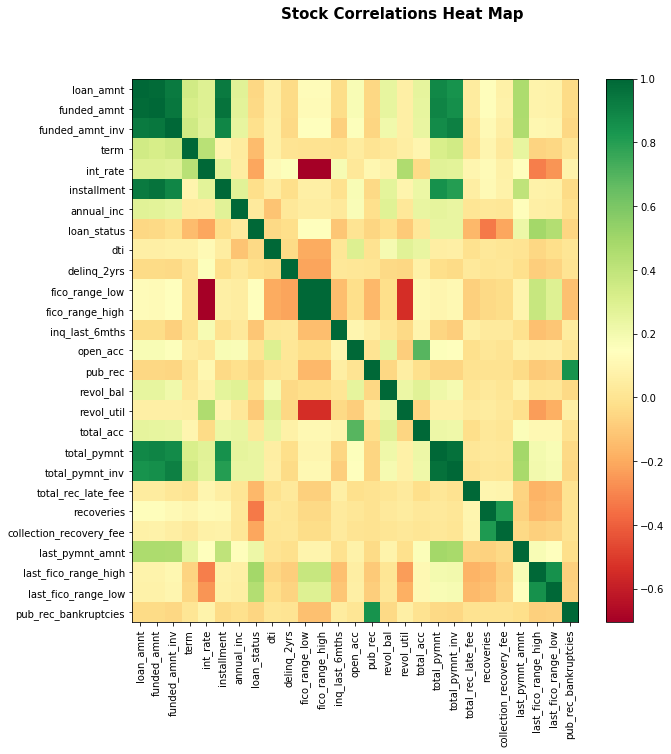

In [42]:
#Find correlation 
names = list(loan.columns)
corr = loan.corr()
# plot correlation matrix
#Plot Correlation Matrix using Matplotlib
%pylab inline
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Stock Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()


In [43]:
'''Observations:
1.loan_amnt,funded_amnt are highly correlated,so either one of them can be removed
2. Same for pub_rec and pub_rec_bankruptcies
3. Same for int_rate and fico_range_low,fico_range_high
'''

'Observations:\n1.loan_amnt,funded_amnt are highly correlated,so either one of them can be removed\n2. Same for pub_rec and pub_rec_bankruptcies\n3. Same for int_rate and fico_range_low,fico_range_high\n'

In [44]:
loan.drop(["funded_amnt","pub_rec_bankruptcies","fico_range_low","fico_range_high"],axis=1,inplace=True)

In [45]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41988 entries, 0 to 42535
Data columns (total 26 columns):
loan_amnt                  41988 non-null float64
funded_amnt_inv            41988 non-null float64
term                       41988 non-null float64
int_rate                   41988 non-null float64
installment                41988 non-null float64
grade                      41988 non-null object
home_ownership             41988 non-null object
annual_inc                 41984 non-null float64
verification_status        41988 non-null object
loan_status                41988 non-null float64
dti                        41988 non-null float64
delinq_2yrs                41959 non-null float64
inq_last_6mths             41959 non-null float64
open_acc                   41959 non-null float64
pub_rec                    41959 non-null float64
revol_bal                  41988 non-null float64
revol_util                 41898 non-null float64
total_acc                  41959 non-null fl

In [46]:
'''Now we only need to encode 3 categorical features and transform and scale numerical features,
but before that we should create feature and response'''

'Now we only need to encode 3 categorical features and transform and scale numerical features,\nbut before that we should create feature and response'

In [47]:
#Create features and Response
loan_data = loan.drop("loan_status",axis=1)
loan_label = loan["loan_status"]


In [48]:
cat_attribs = ['grade','home_ownership','verification_status']
loan_num = loan_data.drop(cat_attribs,axis = 1)
num_attribs = list(loan_num)

In [49]:
loan_prepared_cat = pd.get_dummies(loan_data[cat_attribs])




In [50]:
loan_data = pd.concat([loan_data,loan_prepared_cat],axis=1)

In [51]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41988 entries, 0 to 42535
Data columns (total 40 columns):
loan_amnt                              41988 non-null float64
funded_amnt_inv                        41988 non-null float64
term                                   41988 non-null float64
int_rate                               41988 non-null float64
installment                            41988 non-null float64
grade                                  41988 non-null object
home_ownership                         41988 non-null object
annual_inc                             41984 non-null float64
verification_status                    41988 non-null object
dti                                    41988 non-null float64
delinq_2yrs                            41959 non-null float64
inq_last_6mths                         41959 non-null float64
open_acc                               41959 non-null float64
pub_rec                                41959 non-null float64
revol_bal                 

In [52]:
loan_data = loan_data.drop(cat_attribs,axis = 1)

In [53]:
'''Class to select given datatype columns'''
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [54]:
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Imputer


In [55]:
num_pipeline = Pipeline([
                           ('selector',DataFrameSelector(num_attribs)),
                           ('imputer',Imputer(strategy='median')),
                           ('std_scalar',StandardScaler())
                       ])

In [56]:
loan_prepared_num = num_pipeline.fit_transform(loan_data)

In [57]:
loan_prepared_num.shape

(41988, 22)

In [58]:
loan_prepared_num = pd.DataFrame(loan_prepared_num,columns=num_attribs)

In [59]:
loan_data = loan_data.drop(num_attribs,axis=1)

In [60]:
loan_data.shape

(41988, 15)

In [61]:
loan_prepared_num.index

RangeIndex(start=0, stop=41988, step=1)

In [62]:
loan_data.index

Int64Index([    0,     1,     2,     3,     5,     6,     7,     8,     9,
               10,
            ...
            42526, 42527, 42528, 42529, 42530, 42531, 42532, 42533, 42534,
            42535],
           dtype='int64', length=41988)

In [63]:
loan_prepared_num = loan_prepared_num.set_index(loan_data.index)

In [64]:
loan_prepared = pd.concat([loan_prepared_num,loan_data],axis=1)

In [65]:
loan_prepared.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,-0.816440,-0.717811,-0.575774,-0.399141,-0.759593,-0.700410,2.126020,-0.297612,-0.055711,-1.408960,...,0,0,0,0,0,0,1,0,0,1
1,-1.156761,-1.068494,1.736794,0.852565,-1.253834,-0.607124,-1.836527,-0.297612,2.555000,-1.408960,...,0,0,0,0,0,0,1,0,1,0
2,-1.170374,-1.082663,-0.575774,1.039508,-1.136317,-0.883064,-0.688652,-0.297612,0.596967,-1.631287,...,0,0,0,0,0,0,1,1,0,0
3,-0.135798,-0.005819,-0.575774,0.370306,0.086717,-0.308607,0.988553,-0.297612,-0.055711,0.147328,...,0,0,0,0,0,0,1,0,1,0
5,-0.816440,-0.714269,-0.575774,-1.144204,-0.790339,-0.513837,-0.319905,-0.297612,1.249645,-0.074999,...,0,0,0,0,0,0,1,0,1,0


In [66]:
loan_prepared.isnull().sum()

loan_amnt                              0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
annual_inc                             0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
total_pymnt                            0
total_pymnt_inv                        0
total_rec_late_fee                     0
recoveries                             0
collection_recovery_fee                0
last_pymnt_amnt                        0
last_fico_range_high                   0
last_fico_range_low                    0
grade_A                                0
grade_B                                0
grade_C         

In [67]:
loan_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41988 entries, 0 to 42535
Data columns (total 37 columns):
loan_amnt                              41988 non-null float64
funded_amnt_inv                        41988 non-null float64
term                                   41988 non-null float64
int_rate                               41988 non-null float64
installment                            41988 non-null float64
annual_inc                             41988 non-null float64
dti                                    41988 non-null float64
delinq_2yrs                            41988 non-null float64
inq_last_6mths                         41988 non-null float64
open_acc                               41988 non-null float64
pub_rec                                41988 non-null float64
revol_bal                              41988 non-null float64
revol_util                             41988 non-null float64
total_acc                              41988 non-null float64
total_pymnt            

In [68]:
len(loan_label)

41988

In [69]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
loan_train, loan_test, loan_status_train, loan_status_test = train_test_split(loan_prepared, loan_label, test_size = 0.20, random_state = 42)


C:\Users\Vani\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [70]:
#All numeric data and no null values,create a model

In [71]:
'''We will try following models and then choose the best model by comparing cross validation accuracy,then fine tune the model
1.Logistic regression
2.KNN
3.SGD Classifier
4.SVM
5.Random Forest

'''




'We will try following models and then choose the best model by comparing cross validation accuracy,then fine tune the model\n1.Logistic regression\n2.KNN\n3.SGD Classifier\n4.SVM\n5.Random Forest\n\n'

In [72]:
#1.Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

lg_classifier = LogisticRegression()
lg_classifier.fit(loan_train,loan_status_train)
lg_loan_pred = lg_classifier.predict(loan_train)

In [110]:
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,classification_report



In [109]:
confusion_matrix(loan_status_train,lg_loan_pred)

array([[ 4761,   335],
       [   52, 28442]])

In [102]:
lg_classifier.score(X=loan_train,y=loan_status_train)

0.98847871390294728

In [75]:
lg_accu_score = cross_val_score(lg_classifier,loan_train,loan_status_train,cv=3,scoring='accuracy')

In [116]:
lg_accu_score.mean()

0.98693068018302121

In [115]:
print(classification_report(loan_status_train, lg_loan_pred))


             precision    recall  f1-score   support

        0.0       0.99      0.93      0.96      5096
        1.0       0.99      1.00      0.99     28494

avg / total       0.99      0.99      0.99     33590



In [79]:
#2.KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_classifier.fit(loan_train,loan_status_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [83]:
knn_accu_score = cross_val_score(knn_classifier,loan_train,loan_status_train,cv=3,scoring='accuracy')

In [84]:
knn_accu_score

array([ 0.91917478,  0.91756721,  0.91809575])

In [85]:
#3.SGD classifier

In [86]:
from sklearn.linear_model import SGDClassifier
sgd_classfier = SGDClassifier(random_state=42)
sgd_classfier.fit(loan_train,loan_status_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [87]:
sgd_accu_score = cross_val_score(sgd_classfier,loan_train,loan_status_train,cv=3,scoring='accuracy')

In [88]:
sgd_accu_score

array([ 0.97954809,  0.98454943,  0.98160057])

In [89]:
#SVM

In [90]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf',random_state=0)
svm_classifier.fit(loan_train,loan_status_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [91]:
svm_accu_score = cross_val_score(svm_classifier,loan_train,loan_status_train,cv=3,scoring='accuracy')

In [92]:
svm_accu_score

array([ 0.97767259,  0.98204876,  0.98088603])

In [93]:
#5 Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier(n_estimators=15,criterion="entropy",random_state=0)
forest_classifier.fit(loan_train,loan_status_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [95]:
forest_accu_score = cross_val_score(svm_classifier,loan_train,loan_status_train,cv=3,scoring='accuracy')

In [96]:
forest_accu_score

array([ 0.97767259,  0.98204876,  0.98088603])

In [ ]:
#As Logistic Regression has highest accuracy without need of any tuning on training set we'll choose it for test set.

In [137]:

lg_classifier.score(X=loan_test,y=loan_status_test)

0.9876160990712074

In [138]:
#Issues Faced
'''
1.Faced issue while deciding random sampling or Stratified sampling as there were almost 
61 columns..finally decided to split data on loan_amnt but got error
split_object.split(loan_without_null,loan_without_null["loan_amnt"])
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
2.Faced problems while creating ObjectToNumericConverter
I was trying to manipulate values in brute force way on my own.After much effort
found out replace function
3.Not able to create cat_pipeline for multiple categorical features.At this stage I believe 
cat pipeline can be only used if we have only 1 categorical feature.But need to confirm...
For binarizer not able to create pipeline.So tried get_dumies method to encode.
But for time being pipeline not created,maybe later I'll create it.'
4.As i was not able to perfect the pipeline,I have to modify the code to split the data
into training and test set after all cleaning..ideally we should split it at the start
to avoid data snooping
5.Got accuracy as almost 99% on test set..wondering how is it possible to get so high accuracy..need to get 
this algo verfied someone..I'll also verify
'''

'\n1.Faced issue while deciding random sampling or Stratified sampling as there were almost \n61 columns..finally decided to split data on loan_amnt but got error\nsplit_object.split(loan_without_null,loan_without_null["loan_amnt"])\nValueError: Input contains NaN, infinity or a value too large for dtype(\'float64\').\n2.Faced problems while creating ObjectToNumericConverter\nI was trying to manipulate values in brute force way on my own.After much effort\nfound out replace function\n3.Not able to create cat_pipeline for multiple categorical features.At this stage I believe \ncat pipeline can be only used if we have only 1 categorical feature.But need to confirm...\nFor binarizer not able to create pipeline.So tried get_dumies method to encode.\nBut for time being pipeline not created,maybe later I\'ll create it.\'\n4.As i was not able to perfect the pipeline,I have to modify the code to split the data\ninto training and test set after all cleaning..ideally we should split it at the st